In [ ]:
# Principal Components Analysis Using Synthetic Data
# Jason Albright
# 8Jul2024

""" 
Summary: Using a synthetic data set containing images of translating 
basic geometric shapes (squares and circles). The objective is to use PCA 
to filter out the the subset of images with a small circle, which might 
represent a defect or some other special feature in the context of object 
detection.
"""

In [1]:
# import packages
import numpy as np

# svd package
from scipy.linalg import svd

# data visualization package
import matplotlib.pyplot as plt

In [2]:
def plot_singular_values(s):

    """ Plot singular value spectrum on semi-log scale. """

    fig, ax = plt.subplots(ncols=1, nrows=1)
    ln = ax.semilogy(range(len(s)), s)
    ax.set_title('Singular values')
    
    return ln

def plot_right_singular_vector(ax, vec, vec_idx):
    
    if not ax:
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))

    name = r'$V_{' + str(vec_idx) + '}$'
    ln = ax.plot(vec, label=name)
    ax.set_title(name)

    return ln

def plot_left_singular_vector_as_img_obj(ax, vec_as_img_obj, idx):

    """ Plot left singular vectors (columns of matrix U) reshaped 
    with the dimensions of the original image object. """

    if not ax: 
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4,4))
    
    im = ax.imshow(vec_as_img_obj, cmap='gray')
    ax.set_title(r'$U_{' + str(idx) + '}$')
    ax.set_axis_off()

    return im

def plot_3x3_panel_left_singular_vectors_as_img_obj(vec_list, idx_list):

    """ Create 3x3 panel (or profile) plot showing several reshaped
    principal components or modes. """

    if len(idx_list) > 9:
        return 0

    fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(8,8))
    fig.tight_layout()

    count = 0
    for ax in np.ravel(axs):
        plot_left_singular_vector_as_img_obj(ax, vec_list[count], idx_list[count])
        count +=1
            
    return None

def plot_vertical_panel_right_singular_vectors(vec_list, idx_list):

    """ Create 9x1 panel (or profile) plot showing several right singular 
    vectors of Vt (rows of transpose(V)). These curves show the correlation between 
    a specified U_{idx} and the columns of the data matrix X. """

    if len(idx_list) > 9:
        return 0

    fig, axs = plt.subplots(ncols=1, nrows=9, figsize=(12,16))
    fig.tight_layout()

    count = 0
    for ax in np.ravel(axs):
        plot_right_singular_vector(ax, vec_list[count], idx_list[count])
        count +=1
            
    return None

In [3]:
# Load data matrix X --input for principal component analysis
# assumes feature vectors are arranged column-wise
file_name = 'shifting_square_and_circle_synthetic_data.csv'
X = np.loadtxt(file_name)
img_obj_shape = [100,100]

# COMMENT ON DATA SET: This is a synthetically generated data set. Each images has a square (randomly shifted around the image center). 
# Several (<10) images have a small circle, i.e., hole, in a random location in the square. The goal of this data set was 
# to demonstrate if PCA could filter out the images with the holes. 

In [4]:
# shift data by mean(X)
Xbar = X - np.mean(X)

In [5]:
# compute svd(X)
U, s, Vt = svd(Xbar, full_matrices=False)

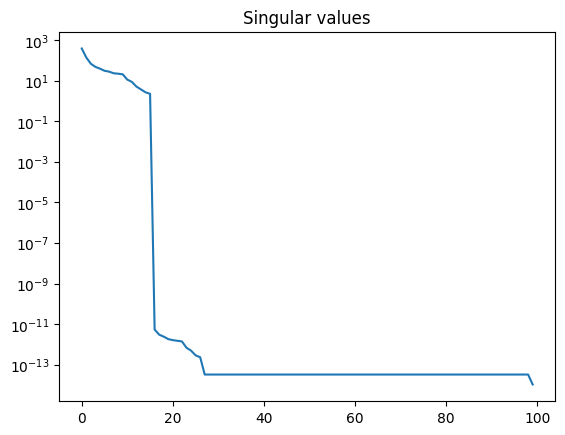

In [6]:
# plot singular values
plot_singular_values(s)

# COMMENT ON RESULTS: The curve of the singular values has several corners or kinks that 
# correlate visually with distinct structural changes to the images in the plot
# generated in the subsequent cell

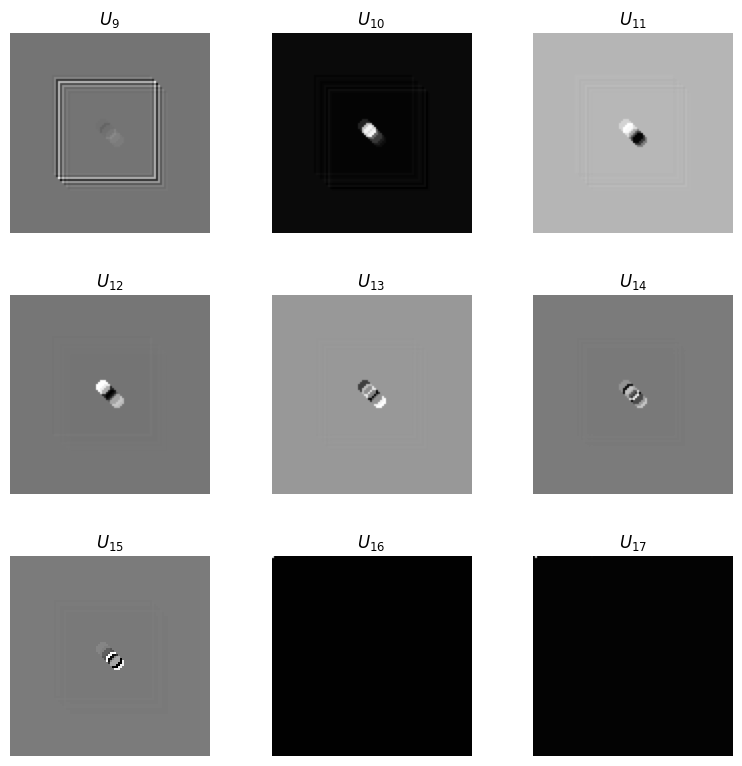

In [7]:
idx_list = list()
u_list = list()
for i in range(9,18):
    idx_list.append(i)
    basis_obj = np.reshape(U[:,idx_list[-1]], img_obj_shape)
    u_list.append(basis_obj)

plot_3x3_panel_left_singular_vectors_as_img_obj(u_list, idx_list)

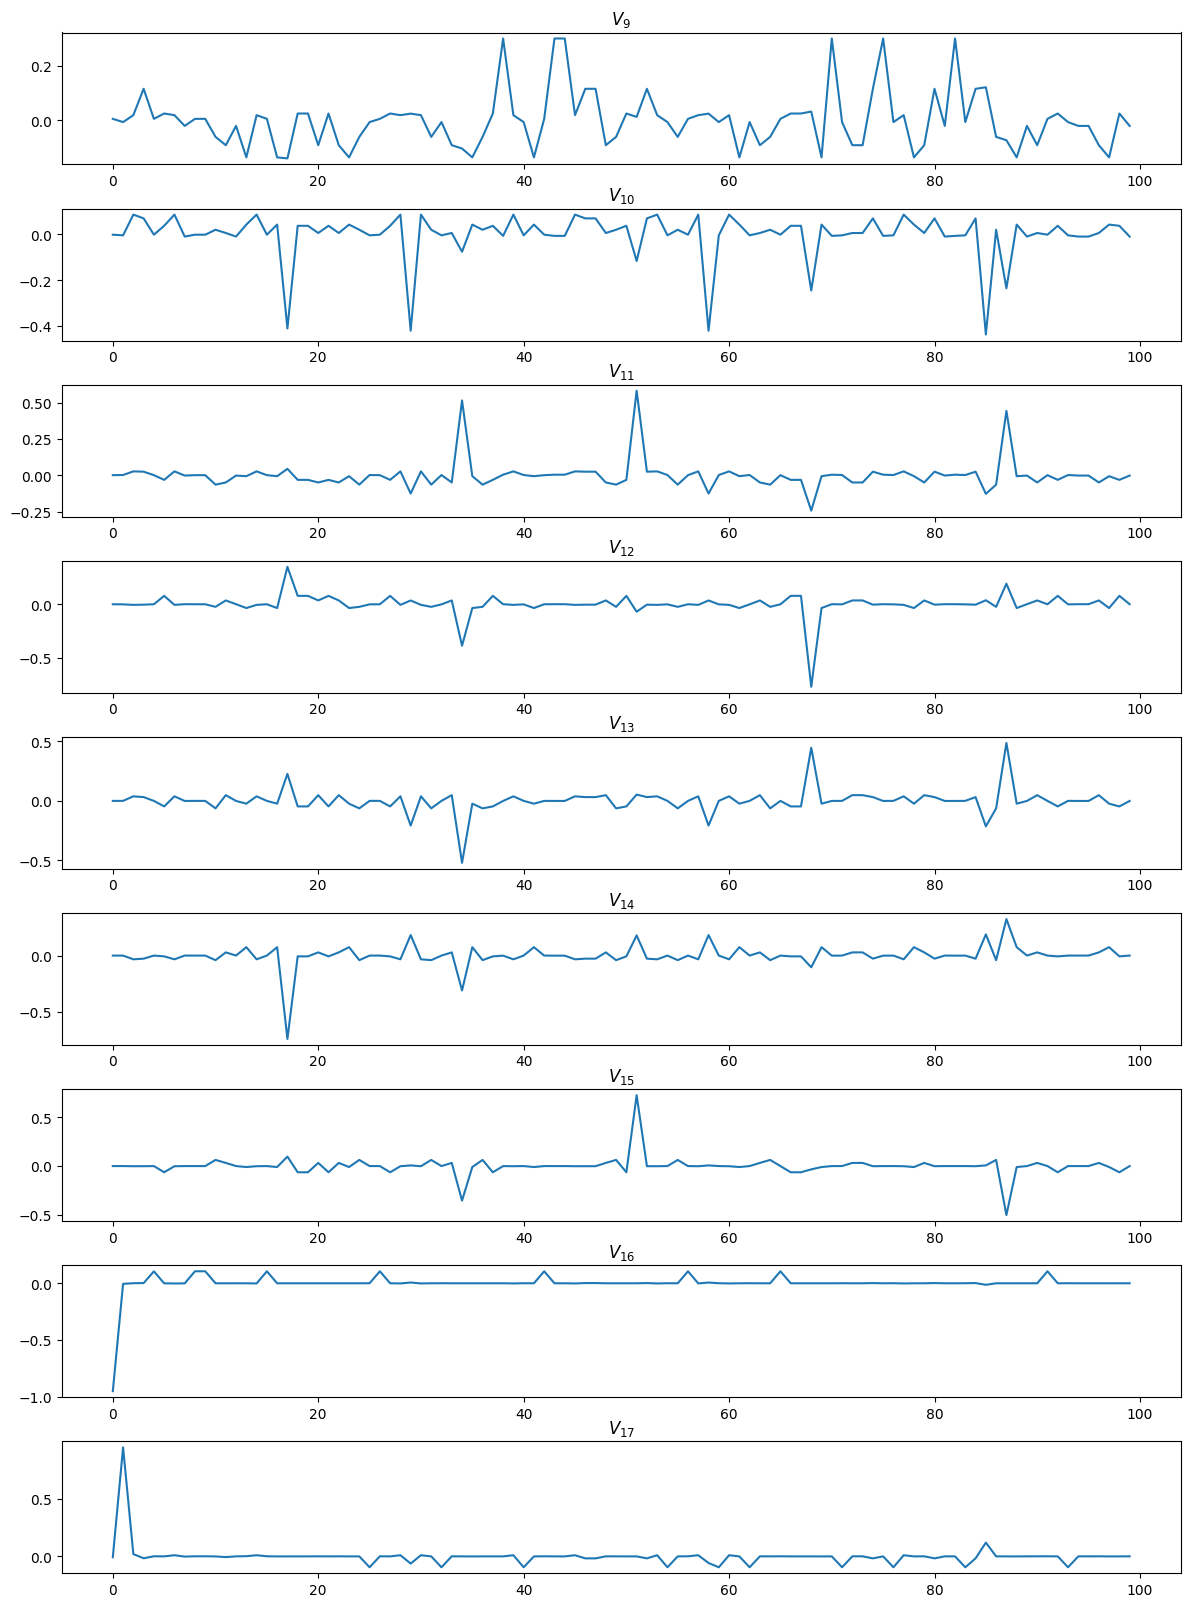

In [8]:
v_list = list()
for idx in idx_list:
    v_list.append(Vt[idx,:])
plot_vertical_panel_right_singular_vectors(v_list, idx_list)

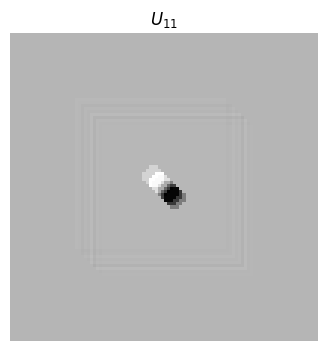

In [9]:
idx = 11
basis_obj = np.reshape(U[:,idx], img_obj_shape)
plot_left_singular_vector_as_img_obj(None, basis_obj, idx)

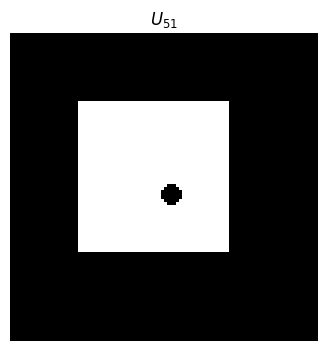

In [10]:
idx = 51
img_obj = np.reshape(X[:,idx], img_obj_shape)
plot_left_singular_vector_as_img_obj(None, img_obj, idx)

# CONCLUSION: using plot V_11 to identify idx=51 where V_11 achieves a local maximum, 
# we can see that principal component (mode) corresponding to U_11 can be used 
# to filter out images with small holes.

# Also: It's interesting to note that the principal components (data-driven basis elements) 
# appear to be paired, not unlike the sine and cosine pairs in Fourier Analysis